In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
rawdf = pd.read_csv('wbBD/wb_bd.csv')
ind_df = pd.read_csv('wbBD/indicators.csv', index_col='INDICATOR_CODE')
indicator = ind_df['INDICATOR_NAME']

In [4]:
indicator[indicator.str.startswith('Inf')]

INDICATOR_CODE
NY.GDP.DEFL.KD.ZG                      Inflation, GDP deflator (annual %)
IC.FRM.CORR.ZS          Informal payments to public officials (% of fi...
FP.CPI.TOTL.ZG                      Inflation, consumer prices (annual %)
NY.GDP.DEFL.KD.ZG.AD    Inflation, GDP deflator: linked series (annual %)
Name: INDICATOR_NAME, dtype: object

In [5]:
rawdf.set_axis(rawdf.loc[3], axis=1, inplace=True)

In [6]:
df = rawdf.iloc[3:, 2:].set_index('Indicator Code').drop('Indicator Code')

In [7]:
df.drop(['Indicator Name'], axis=1, inplace=True)
df = df.transpose()

In [8]:
df.reset_index(inplace=True)

In [9]:
df[3] = pd.to_datetime(df[3], format="%Y")

In [10]:
df.rename(columns={3:'Year'}, inplace=True)

In [11]:
df.set_index('Year', inplace=True)

In [12]:
seventies = df['NY.GDP.DEFL.KD.ZG'].dropna()['1967':'1980']

In [13]:
years = seventies.index.strftime('%Y')
inf_rate = seventies.values

In [14]:
yr_list = list(years)
rate_list = list(inf_rate)

In [15]:
yr_list.reverse()
rate_list.reverse()

Text(0.5, 1.0, 'Inflation Rate in Bangladesh')

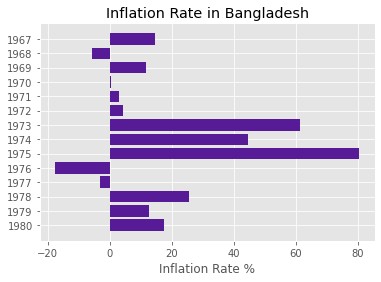

In [16]:
plt.barh(yr_list, rate_list, color='#581b98')
plt.xlabel('Inflation Rate %')
plt.title('Inflation Rate in Bangladesh')
#plt.savefig('savefig/inf_rate_bd.png', dpi=1000)